# Assignment 2

In this assigment, we will work with the *Adult* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult). Extract the data files into the subdirectory: `../05_src/data/adult/` (relative to `./05_src/`).

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../05_src/data/adult/`, then you can use the code below to load them.

In [1]:
import os
os.getcwd()



'/Users/ernanifantinatti/Documents/DSI/Class/Scaling/scaling_to_production/02_activities/assignments'

In [2]:
import pandas as pd
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
]
adult_dt = (pd.read_csv('../../05_src/data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))


# Get X and Y

Create the features data frame and target data:

+ Create a dataframe `X` that holds the features (all columns that are not `income`).
+ Create a dataframe `Y` that holds the target data (`income`).
+ From `X` and `Y`, obtain the training and testing data sets:

    - Use a train-test split of 70-30%. 
    - Set the random state of the splitting function to 42.

In [4]:
# Some house keeping
import janitor

# Verifying columns (prior)
print(f"adult_dt (prior): {adult_dt.columns.to_list()}")


adult_dt = adult_dt.clean_names(case_type='snake')

# Verifying columns (after)
print(f"adult_dt (after): {adult_dt.columns.to_list()}")

features_cols = adult_dt.columns[adult_dt.columns != 'income']
income_col = adult_dt.columns[adult_dt.columns == 'income']


adult_dt (prior): ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
adult_dt (after): ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']


In [5]:
adult_dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [6]:
#Creating dataframes and listing their columns
X = adult_dt[features_cols]
y = adult_dt[income_col]

print(f"X: {X.columns}")
print(f"y: {y.columns}")


X: Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country'],
      dtype='object')
y: Index(['income'], dtype='object')


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
#Extra verification on Train / Test split
print(f"len(X): {len(X)}")
print(f"len(X_train): {len(X_train)}")
print(f"len(X_test): {len(X_test)}")
print(f"int(len(X_test)) + int(len(X_train)): {int(len(X_test)) + int(len(X_train))}")
print(f"int len(X_train): {int(len(X_train))}")
print(f"len(X_test): {len(X_test)}")
print(f"Train split ratio: {1 - int(len(X_test))/int(len(X_train)):.2f}%")
print(f"Test split ratio: {int(len(X_test))/int(len(X_train)):.2f}%")


len(X): 32561
len(X_train): 22792
len(X_test): 9769
int(len(X_test)) + int(len(X_train)): 32561
int len(X_train): 22792
len(X_test): 9769
Train split ratio: 0.57%
Test split ratio: 0.43%


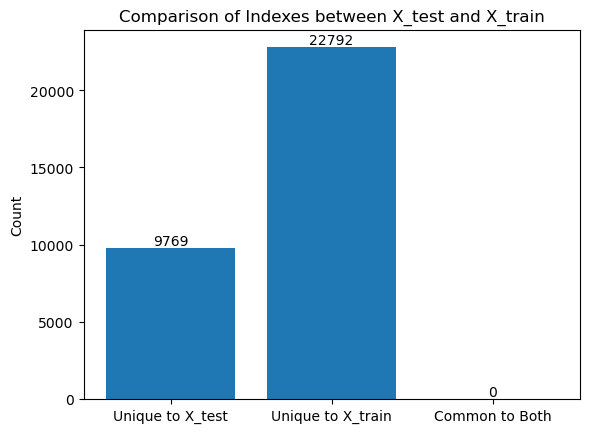

In [38]:
import matplotlib.pyplot as plt

indexes_test = X_test.index.to_list()
indexes_train = X_train.index.to_list()

unique_to_test = len(set(indexes_test) - set(indexes_train))
unique_to_train = len(set(indexes_train) - set(indexes_test))
common_to_both = len(set(indexes_test).intersection(set(indexes_train)))

labels = ['Unique to X_test', 'Unique to X_train', 'Common to Both']
counts = [unique_to_test, unique_to_train, common_to_both]

plt.bar(labels, counts)

# Adding numbers on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.ylabel('Count')
plt.title('Comparison of Indexes between X_test and X_train')
plt.show()

## Random States

Please comment: 

+ What is the [random state](https://scikit-learn.org/stable/glossary.html#term-random_state) of the [splitting function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)? <br>
    * *Answer:* `random_state` is a parameter used to control the randomness of an operation.<br>
+ Why is it [useful](https://en.wikipedia.org/wiki/Reproducibility)?<br>
   * *Answer:* It ensures reproducibility of results across different runs of the code, i.e., allows you to get the same results every time you run your code, given the same inputs and conditions.

##### Further comments and context:

* Using random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    * > This will always give the same split

* Using a different random_state value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
    * > This will give a different split

* Without setting random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    * > his will give a different split each time you run the code

# Preprocessing

Create a [Column Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) that treats the features as follows:

- Numerical variables

    * Apply [KNN-based imputation for completing missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html):
        
        + Consider the 7 nearest neighbours.
        + Weight each neighbour by the inverse of its distance, causing closer neigbours to have more influence than more distant ones.
    * [Scale features using statistics that are robust to outliers](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler).

- Categorical variables: 
    
    * Apply a [simple imputation strategy](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer):

        + Use the most frequent value to complete missing values, also called the *mode*.

    * Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):
        
        + Handle unknown labels if they exist.
        + Drop one column for binary variables.
    
    
The column transformer should look like this:

![](./images/assignment_2__column_transformer.png)

In [53]:
dtypes = X.dtypes
sorted_columns = dtypes.sort_values().index
X_sorted = X[sorted_columns]
print(X_sorted.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   fnlwgt          32561 non-null  int64 
 2   education_num   32561 non-null  int64 
 3   capital_gain    32561 non-null  int64 
 4   capital_loss    32561 non-null  int64 
 5   hours_per_week  32561 non-null  int64 
 6   workclass       32561 non-null  object
 7   education       32561 non-null  object
 8   marital_status  32561 non-null  object
 9   occupation      32561 non-null  object
 10  relationship    32561 non-null  object
 11  race            32561 non-null  object
 12  sex             32561 non-null  object
 13  native_country  32561 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.5+ MB
None


In [63]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print(f"numerical_cols: {numerical_cols}")
print(f"categorical_cols: {categorical_cols}")

# Creating a pipeline of tasks

    # num_transforms functions
num_transforms = Pipeline(steps=[
    ('KNNimputer', KNNImputer(n_neighbors = 7,weights='distance')),
    ('scaler', RobustScaler())
])
    # cat_transforms functions
cat_transforms= Pipeline(steps=[
    ('simpleimputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='if_binary'))
])

    # column transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transforms', num_transforms, numerical_cols), 
        ('cat_transforms', cat_transforms, categorical_cols)   
    ]
)

preprocessor


numerical_cols: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_cols: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


ColumnTransformer(transformers=[('num_transforms',
                                 Pipeline(steps=[('KNNimputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('scaler', RobustScaler())]),
                                 ['age', 'fnlwgt', 'education_num',
                                  'capital_gain', 'capital_loss',
                                  'hours_per_week']),
                                ('cat_transforms',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='infrequent_if_exist'))]),
                                 ['workclass', 'education', 'marital_status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native_country'])])

## Model Pipeline

Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `classifier` and assign a [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to it.

The pipeline looks like this:

![](./images/assignment_2__pipeline.png)

In [66]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.ensemble import RandomForestClassifier

# Identify numerical and categorical columns
#numerical_cols = X.select_dtypes(include=['number']).columns.tolist()
#categorical_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print(f"numerical_cols: {numerical_cols}")
print(f"categorical_cols: {categorical_cols}")

# Creating a pipeline of tasks

    # num_transforms functions
num_transforms = Pipeline(steps=[
    ('KNNimputer', KNNImputer(n_neighbors = 7,weights='distance')),
    ('scaler', RobustScaler())
])
    # cat_transforms functions
cat_transforms= Pipeline(steps=[
    ('simpleimputer',SimpleImputer(strategy = 'most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='infrequent_if_exist',drop='if_binary'))
])

    # column transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num_transforms', num_transforms, numerical_cols), 
        ('cat_transforms', cat_transforms, categorical_cols)   
    ]
)

# Create  pipeline
pipeline = Pipeline(steps=[
    ('Preprocessing', preprocessor)
    ,('Forest',RandomForestClassifier())

])

pipeline


numerical_cols: ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_cols: ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']


Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(transformers=[('num_transforms',
                                                  Pipeline(steps=[('KNNimputer',
                                                                   KNNImputer(n_neighbors=7,
                                                                              weights='distance')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education_num',
                                                   'capital_gain',
                                                   'capital_loss',
                                                   'hours_per_week']),
                                                 ('cat_transforms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='infrequent_if_exist'))]),
                                                  ['workclass', 'education',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native_country'])])),
                ('Forest', RandomForestClassifier())])

# Cross-Validation

Evaluate the model pipeline using [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html):

+ Measure the following [preformance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values): negative log loss, ROC AUC, accuracy, and balanced accuracy.
+ Report the training and validation results. 
+ Use five folds.


In [68]:
pipeline.fit(X_train,y_train)
from sklearn.model_selection import cross_validate
scoring = ['neg_log_loss', 'roc_auc', 'accuracy','balanced_accuracy']


res_simple_dict = cross_validate(pipeline, X_train, y_train, cv = 5, scoring = scoring)


/Users/ernanifantinatti/miniforge3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/ernanifantinatti/miniforge3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/ernanifantinatti/miniforge3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/ernanifantinatti/miniforge3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.

Display the fold-level results as a pandas data frame and sorted by negative log loss of the test (validation) set.

In [69]:
res_simple = pd.DataFrame(res_simple_dict).assign(experiment = 1)
res_simple.sort_values(by='test_neg_log_loss')


,fit_time,score_time,test_neg_log_loss,test_roc_auc,test_accuracy,test_balanced_accuracy,experiment
4,6.125073,0.207772,-0.394311,0.902221,0.858052,0.781392,1
2,5.990469,0.222191,-0.386399,0.902874,0.854541,0.775076,1
1,6.373264,0.220248,-0.380933,0.902208,0.847335,0.770161,1
3,6.196894,0.208008,-0.354954,0.908205,0.858052,0.782315,1
0,5.993787,0.214899,-0.343325,0.904591,0.850406,0.773418,1


Calculate the mean of each metric. 

In [70]:
res_simple.mean()


fit_time                  6.135897
score_time                0.214624
test_neg_log_loss        -0.371984
test_roc_auc              0.904020
test_accuracy             0.853677
test_balanced_accuracy    0.776473
experiment                1.000000
dtype: float64

Calculate the same performance metrics (negative log loss, ROC AUC, accuracy, and balanced accuracy) using the testing data `X_test` and `Y_test`. Display results as a dictionary.

*Tip*: both, `roc_auc()` and `neg_log_loss()` will require prediction scores from `pipe.predict_proba()`. However, for `roc_auc()` you should only pass the last column `Y_pred_proba[:, 1]`. Use `Y_pred_proba` with `neg_log_loss()`.

In [73]:
import sklearn.metrics
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score, balanced_accuracy_score

# Perform pipeline functions on the X data sets
Y_prediction_test = pipeline.predict(X_test)
Y_probability_test = pipeline.predict_proba(X_test)

# create a dictionary to store model results/performance metrics
res = {
    'neg_log_loss': -log_loss(Y_prediction_test, Y_probability_test)
    ,'roc_auc': roc_auc_score(Y_prediction_test, Y_probability_test[:,1])
    ,'accuracy': accuracy_score(y_test, Y_prediction_test)
    , 'balanced_accuracy': balanced_accuracy_score(y_test, Y_prediction_test)
}
res


{'neg_log_loss': -0.1610052960107085,
 'roc_auc': 1.0,
 'accuracy': 0.8546422356433616,
 'balanced_accuracy': 0.7749768272556689}

# Target Recoding

In the first code chunk of this document, we loaded the data and immediately recoded the target variable `income`. Why is this [convenient](https://scikit-learn.org/stable/modules/model_evaluation.html#binary-case)?

The specific line was:

```
adult_dt = (pd.read_csv('../05_src/data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))
```

* *Answer:* <br>
    1 - This code classified the data in two parts, which is used for a binary classification compatibility.<br>
    2 - It also simplifies the analysis and accuracy, ROC are designed for binary targets.<br>
    3 - Use of estimation for probability when income are over 50K.<br>
    4 - Finally, you ensure that the target variable is in a suitable format for binary classification tasks in scikit-learn, streamlining the entire data processing and modeling workflow.<br>

## Criteria

|Criteria|Complete|Incomplete|
|---------------------|----|----|
|Evaluation of model pipeline |Model pipeline was evaluated correctly.|Model pipeline was not evaluated correctly.|
|Explanation of answer|Answer was concise and explained the learner's reasoning in depth.|Answer was not concise and did not explained the learner's reasoning in depth.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-2`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_2.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.